## Predicting heart disease using Machine Learning
 
 This notebook looks into various python-based machine learning and data science libraries  in an attempt to build a machine learning model capable of predicting wether or not a person has heart disease or not based on their medical attributes.

## 1. Problem Defination

In a statement,
> Given clinical parameters about a patient, can we predict whether or not they have heart disease?

## 2. Data

The original data came from Cleavland data from UCI Machine Learning repository.

## 3. Evaluation

> If we can reach 85% accuracy at predicting whether or not a patient has heart disease during the proof of concept, we'll pursue the project

## 4. Features

**create data dictionary**

* id (Unique id for each patient)
* age (Age of the patient in years)
* origin (place of study)
* sex (Male/Female)
* cp chest pain type ([typical angina, atypical angina, non-anginal, asymptomatic])
* trestbps resting blood pressure (resting blood pressure (in mm Hg on admission to the hospital))
* chol (serum cholesterol in mg/dl)
* fbs (if fasting blood sugar > 120 mg/dl)
* restecg (resting electrocardiographic results)
  -- Values: [normal, stt abnormality, lv hypertrophy]
* thalach: maximum heart rate achieved
* exang: exercise-induced angina (True/ False)
* oldpeak: ST depression induced by exercise relative to rest
* slope: the slope of the peak exercise ST segment
* ca: number of major vessels (0-3) colored by fluoroscopy
* thal: [normal; fixed defect; reversible defect]
* num: the predicted attribute

## Preparing the tools

We're gonna use Pandas, Matplotlib and numpy for data analysis and manipulation

In [1]:
# Import all the tools that we would need

# Regular EDA (exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Modul evalution
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

### Load Data

In [2]:
data = pd.read_csv('../scikit-learn/data/heart-disease.csv')
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


## Data Exploration (exploratory data analysis or EDA)

In [3]:
# Are there any missing values
data.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

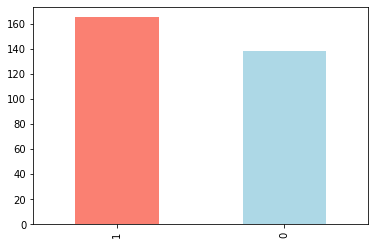

In [4]:
# Label value distribution
data['target'].value_counts().plot(kind='bar', color=['salmon', 'lightblue']);

In [5]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Heart disease frequency according to Sex

In [6]:
data.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [7]:
# Compare target column with sex column
pd.crosstab(data.target, data.sex)

sex,0,1
target,,
0,24,114
1,72,93


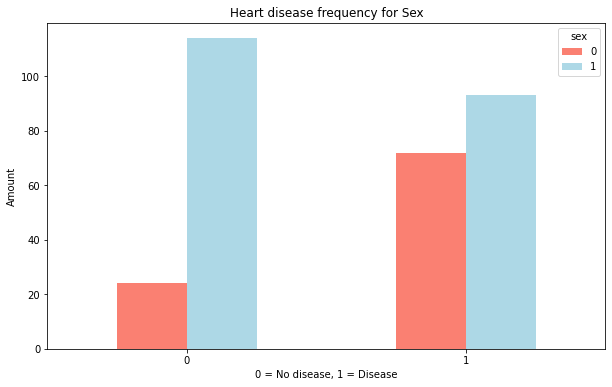

In [8]:
# Create a plot of crosstab
pd.crosstab(data.target, data.sex).plot(kind='bar',
                                        figsize=(10, 6),
                                        color=['salmon', 'lightblue'])

plt.title('Heart disease frequency for Sex')
plt.xlabel('0 = No disease, 1 = Disease')
plt.ylabel('Amount')
plt.xticks(rotation=0);

### Age vs. Max Heart Rate for Heart Disease

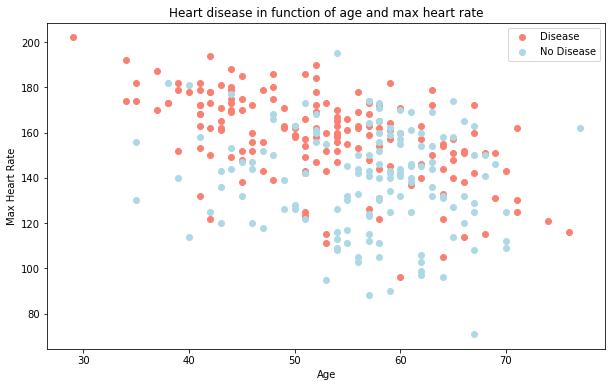

In [9]:
# Create another figure
plt.figure(figsize=(10, 6))

# Scatter with positive examples
plt.scatter(data.age[data.target==1],
            data.thalach[data.target==1],
            color='salmon')


# Scatter with negative examples
plt.scatter(data.age[data.target==0],
            data.thalach[data.target==0],
            color='lightblue');

# Add some helpful info
plt.title('Heart disease in function of age and max heart rate')
plt.xlabel('Age')
plt.ylabel('Max Heart Rate')
plt.legend(['Disease', 'No Disease']);

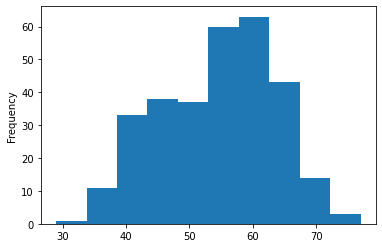

In [10]:
# Check the distribution of the age column with a histogram
data.age.plot.hist();

### Heart disease Frequency per Chest pain type

cp chest pain type:
0 = typical angina
1 = atypical angina
2 = non-anginal
3 = asymptomatic

In [11]:
pd.crosstab(data.cp, data.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


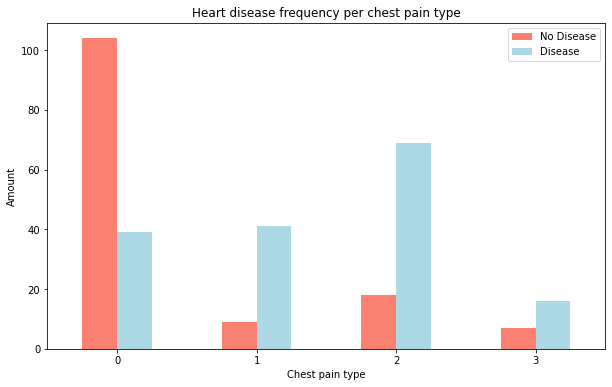

In [12]:
# Make the crosstab more visual
pd.crosstab(data.cp, data.target).plot(kind='bar',
                                       figsize=(10, 6),
                                       color=['salmon', 'lightblue'])

# Add some communication
plt.title('Heart disease frequency per chest pain type')
plt.xlabel('Chest pain type')
plt.ylabel('Amount')
plt.legend(['No Disease', 'Disease'])
plt.xticks(rotation=0);

In [13]:
# Make a correlation matrix
data.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


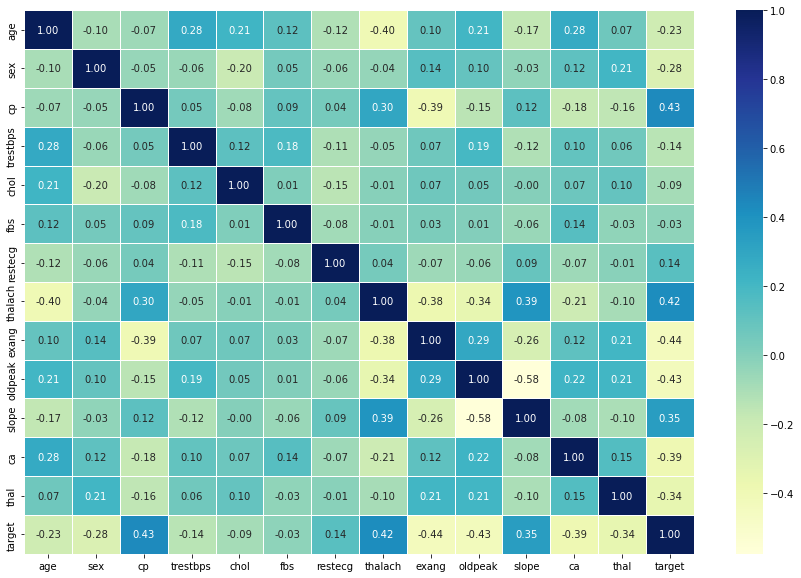

In [14]:
# Let's make this correlation matrix a bit more prettier
corr_matrix = data.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt='.2f',
                 cmap='YlGnBu');

## 5. Modelling

In [15]:
data = data.sample(frac=1)
# Split data into X & y
X = data.drop('target', axis=1)
y = data['target']

In [16]:
np.random.seed(42)


# Train and test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Now we've got our data split into training and test sets, it's time to build a machine learning model.

 We'll train it (to find patterns) on the training set.
 
 And we'll test it (use the patterns) on the test set.
 
 We're going to try 3 different Machine Learning Models:
 1. Logistic Regression
 2. K-Nearest Neighbours Classifier
 3. Random Forest Classifier

In [17]:
# Put models in a dictionary
models = {'Logistic Regression': LogisticRegression(),
          'KNN': KNeighborsClassifier(),
          'Random Forest': RandomForestClassifier()}

# Create a function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given Machine Learning Models
    models : A dict of different Scikit-Learn Machine Learning Models
    X_train : Training data (no labels)
    X_test : Testing data (no labels)
    y_train : Training Labels
    y_test : Testing Labels
    """
    
    np.random.seed(42)
    
    # Make a dictionary to keep model scores
    model_scores = {}
    
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model with testing data and append the score to the dictionary model_scores
        model_scores[name] = model.score(X_test, y_test)
        
    return model_scores

In [18]:
model_scores = fit_and_score(models, X_train, X_test, y_train, y_test)
model_scores

C:\Users\bhara\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8360655737704918,
 'KNN': 0.5901639344262295,
 'Random Forest': 0.8524590163934426}

### Model Comparision

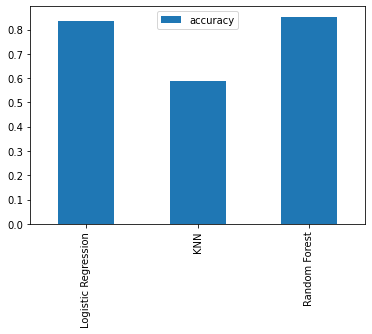

In [19]:
model_compare = pd.DataFrame(model_scores, index=['accuracy'])
model_compare.T.plot.bar();

Now we've got a baseline model and we know that a model's first predictions aren't always what we should based our next steps off.

Let's look at the folowing:
* Hyperparameter tuning
* Feature importance
* Confusion Matrix
* Cross-validation
* Precision
* Recall
* F1 score
* Classification report
* ROC curve
* Area under the curve (AUC)

### Hyperparameter tuning (by Hand)

In [20]:
# Let's tune KNN

train_scores = []
test_scores = []

# Create a list of different values for n_neighbours
neighbors = range(1, 21)

# Setup KNN instance
knn = KNeighborsClassifier()

# Loop through different n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors=i)
    
    # Fit the algorithm
    knn.fit(X_train, y_train)
    
    # update the training scores list
    train_scores.append(knn.score(X_train, y_train))
    
    # Update the test score list
    test_scores.append(knn.score(X_test, y_test))

In [21]:
train_scores

[1.0,
 0.7975206611570248,
 0.7851239669421488,
 0.7727272727272727,
 0.78099173553719,
 0.7603305785123967,
 0.7479338842975206,
 0.7479338842975206,
 0.756198347107438,
 0.7479338842975206,
 0.7603305785123967,
 0.7396694214876033,
 0.7396694214876033,
 0.7231404958677686,
 0.7066115702479339,
 0.7148760330578512,
 0.7396694214876033,
 0.7231404958677686,
 0.7272727272727273,
 0.743801652892562]

In [22]:
test_scores

[0.5573770491803278,
 0.5409836065573771,
 0.639344262295082,
 0.5573770491803278,
 0.5901639344262295,
 0.5737704918032787,
 0.5737704918032787,
 0.5573770491803278,
 0.5737704918032787,
 0.5737704918032787,
 0.5737704918032787,
 0.5901639344262295,
 0.5737704918032787,
 0.5901639344262295,
 0.5737704918032787,
 0.5901639344262295,
 0.5573770491803278,
 0.6065573770491803,
 0.5737704918032787,
 0.5573770491803278]

Maximum KNN score on the test data: 63.93%


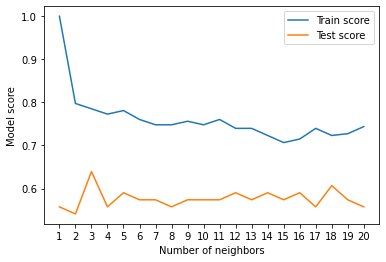

In [23]:
plt.plot(neighbors, train_scores, label='Train score')
plt.plot(neighbors, test_scores, label='Test score')
plt.xticks(np.arange(1, 21, 1))
plt.xlabel('Number of neighbors')
plt.ylabel('Model score')
plt.legend()

print(f'Maximum KNN score on the test data: {max(test_scores) * 100:.2f}%')

## Hyperparameter tuning with RandomizedSearchCV

We're going to tune:
* LogisticRegression()
* RandomForestClassifier()

..using RandomizedSearchCV

In [24]:
# Create a hperparameter grid for LogisticRegression
log_reg_grid = {'C': np.logspace(-4, 4, 20),
                'solver': ['liblinear']}

# Create a hyperparameter grid for RandomForestClassifier
rf_grid = {'n_estimators': np.arange(10, 1000, 50),
           'max_depth': [None, 3, 5, 10],
           'min_samples_split': np.arange(2, 20, 2),
           'min_samples_leaf': np.arange(1, 20, 2)}

Now we've got hyperparameter grids setup for each of our models, let's tune them using RandomizedSearchCV

In [25]:
# Tune LogisticRegression

np.random.seed(42)

# Setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

# Fit rondom hyperparameter search model for LogisticRegression
rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [26]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.615848211066026}

In [27]:
rs_log_reg.score(X_test, y_test)

0.8360655737704918

Now that we've tuned logistic regression model, let's do the same for RandomForestClassifier

In [28]:
np.random.seed(42)

# Setup random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=30,
                           verbose=True)

# Fit random hyperparameter search model for RandomForestCLassifier()
rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=30,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [29]:
#Find the best hyperparameters
rs_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [30]:
rs_rf.score(X_test, y_test)

0.8360655737704918

## Hyperparameter tuning with GridSearchCV

Since our Logistic Regression model provides the best scores(raw), we'll try and improve them using exhaustive gridsearchcv

In [35]:
# Different hyperparameters for our LogistocRegression model
rf_grid = {'n_estimators': np.arange(200, 300, 100),
           'max_depth': [None, 3, 5],
           'min_samples_split': np.arange(2, 20, 4),
           'min_samples_leaf': np.arange(1, 20, 4)}

# Setup grid hyperparameter search for LogisticRegression
gs_rf = GridSearchCV(RandomForestClassifier(),
                           param_grid=rf_grid,
                           cv=5,
                           verbose=True)

# Fit our grid hyperparameter search model
gs_rf.fit(X_train, y_train);

Fitting 5 folds for each of 75 candidates, totalling 375 fits


In [36]:
# Chech the best hyperparamters
gs_rf.best_params_

{'max_depth': 5,
 'min_samples_leaf': 17,
 'min_samples_split': 14,
 'n_estimators': 200}

In [37]:
gs_rf.score(X_test, y_test)

0.8524590163934426

## Evaluating our tuned Machine Learning classifier, beyond accuracy

* ROC curve and AUC score
* Confusion Matric
* Classification Report
* Precision
* Recall
* F1-score

In [38]:
# Make predictions with tuned model
y_preds = gs_rf.predict(X_test)
y_preds

array([0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1], dtype=int64)

C:\Users\bhara\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


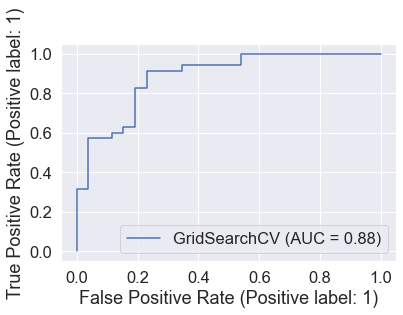

In [47]:
# Plot ROC curve and calculate AUC metric
plot_roc_curve(gs_rf, X_test, y_test);

In [48]:
# Confusion matrix
print(confusion_matrix(y_test, y_preds))

[[20  6]
 [ 3 32]]


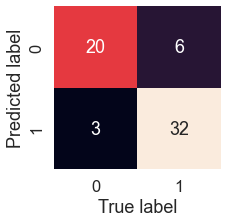

In [51]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_test, y_preds):
    """
    Plots a nice looking confusion matrix using  Seaborn's heatmap()
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True,
                     cbar=False)
    plt.xlabel('True label')
    plt.ylabel('Predicted label')
    
plot_conf_mat(y_test, y_preds)